# 1. Import libraries

In [99]:
# data manipulation
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data

In [2]:
dataset = pd.read_csv('../results/prepared_data.csv')

# set the column type for column with date
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%Y-%m-%d')

dataset

,Data,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm],BRZEG DOLNY (251160230) Brak pomiaru,OSETNO (251160110) Brak pomiaru,£ANY (251170420) Brak pomiaru
0,2017-11-01,286,354,276,334,NaN,0.7,NaN,0.0,0.0,0.0
1,2017-11-02,285,358,281,337,NaN,10.0,NaN,0.0,0.0,0.0
2,2017-11-03,258,353,288,336,NaN,0.1,NaN,0.0,0.0,0.0
3,2017-11-04,218,352,296,333,NaN,0.0,NaN,0.0,0.0,0.0
4,2017-11-05,244,326,304,333,NaN,0.6,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-10-27,322,225,177,320,0.0,0.0,0.0,0.0,0.0,0.0
1457,2021-10-28,317,224,177,318,0.0,0.0,0.0,0.0,0.0,0.0
1458,2021-10-29,317,214,177,319,0.0,0.0,0.0,0.0,0.0,0.0
1459,2021-10-30,316,208,177,319,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
hierarchy = pd.read_csv('../results/hierarchy.csv')

hierarchy

,id_hydro,name_hydro,id_meteo,name_meteo
0,151160060,G£OGÓW,0,no_info
1,151160140,OSETNO,251160110,OSETNO
2,151160170,BRZEG DOLNY,251160230,BRZEG DOLNY
3,151170030,TRESTNO,251170420,£ANY


In [4]:
water_level_suffix = 'Stan wody [cm]'
rains_suffix = 'Suma opadów [mm]'

# 3. EDA

In [5]:
def create_col_name(station_id, station_name, suffix):
    name = f'{station_name} ({station_id}) {suffix}'
    return name

River level over time for different stations.

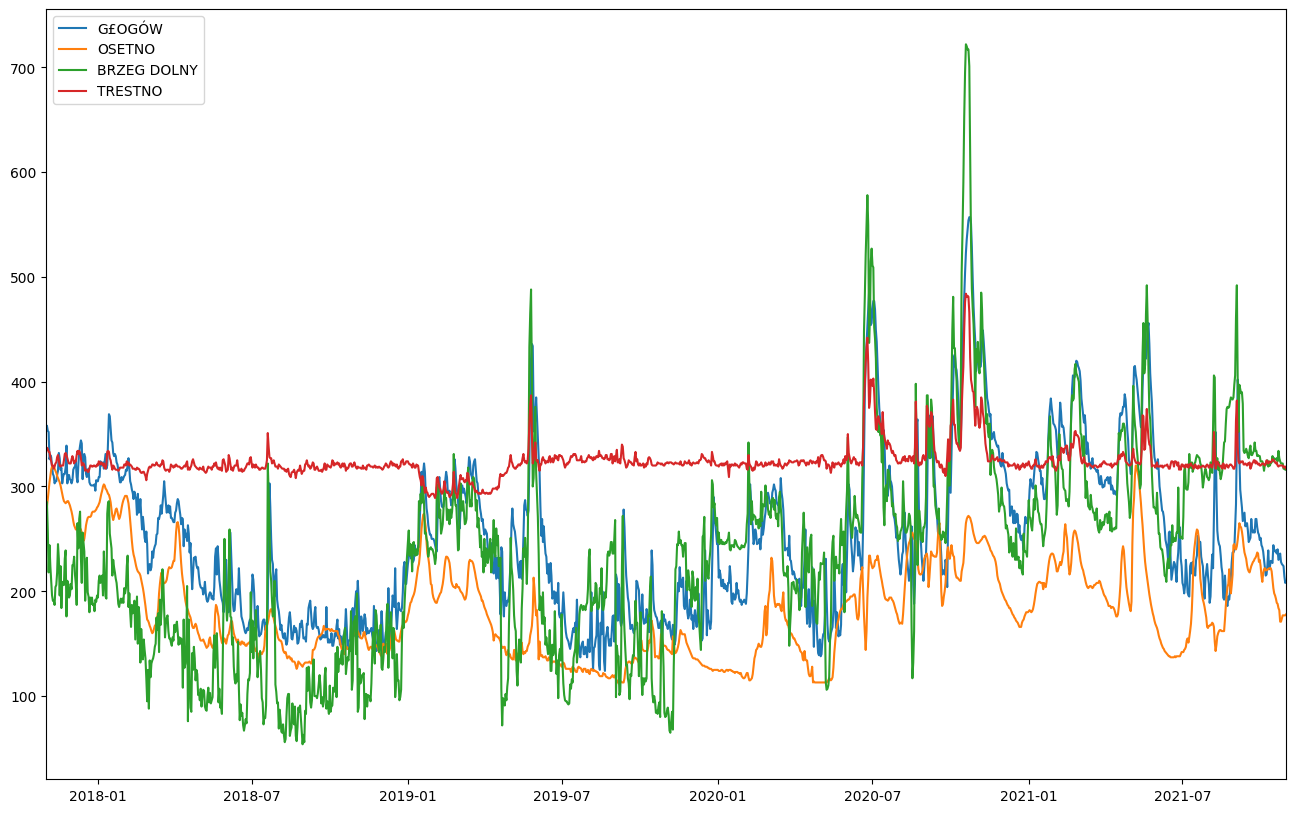

In [6]:
plt.figure(figsize=(16, 10))

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    plt.plot(dataset['Data'], dataset[water_level_col], label=stations["name_hydro"])

    
# decorations
plt.xlim([dataset['Data'].min(), dataset['Data'].max()])
plt.legend(loc='upper left')
plt.show()

River level over time for different stations. ~ Normalized by MinMaxScaler

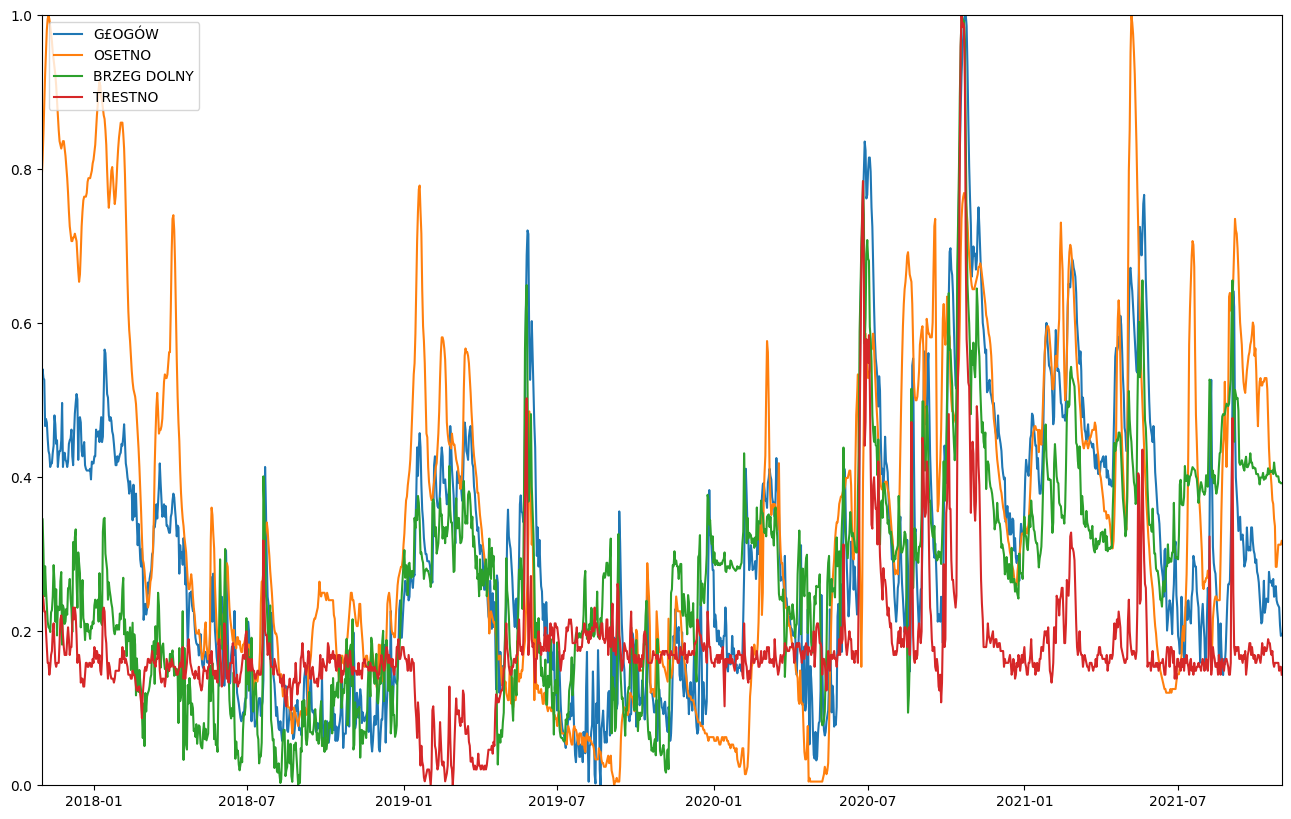

In [7]:
plt.figure(figsize=(16, 10))

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    plt.plot(dataset['Data'], 
             (dataset[water_level_col] - dataset[water_level_col].min())/\
             (dataset[water_level_col].max() - dataset[water_level_col].min()), 
             label=stations["name_hydro"])

    
# decorations
plt.ylim([0, 1])
plt.xlim([dataset['Data'].min(), dataset['Data'].max()])
plt.legend(loc='upper left')
plt.show()

River level over time with sum of rain for this station.

In [8]:
hierarchy

,id_hydro,name_hydro,id_meteo,name_meteo
0,151160060,G£OGÓW,0,no_info
1,151160140,OSETNO,251160110,OSETNO
2,151160170,BRZEG DOLNY,251160230,BRZEG DOLNY
3,151170030,TRESTNO,251170420,£ANY


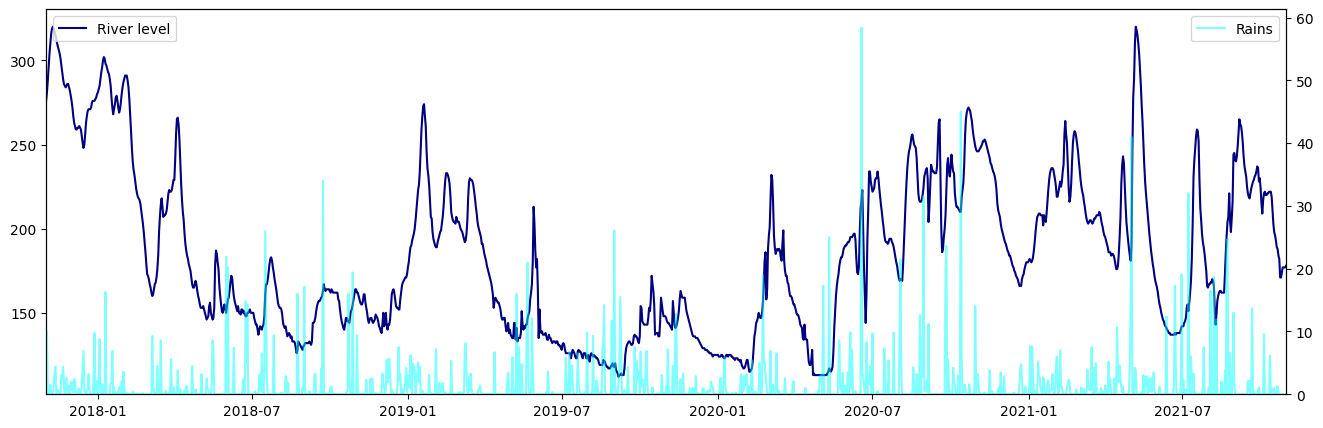

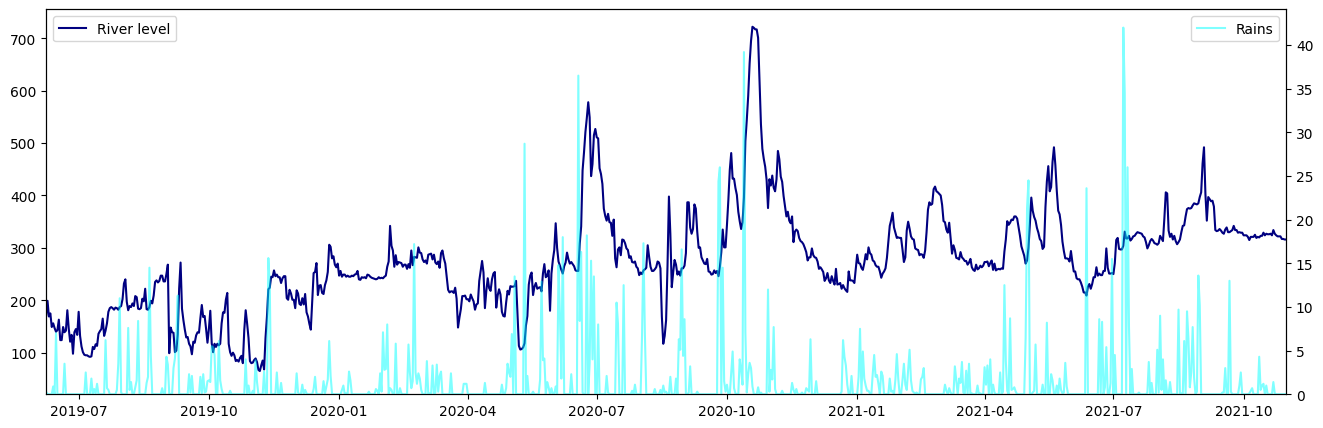

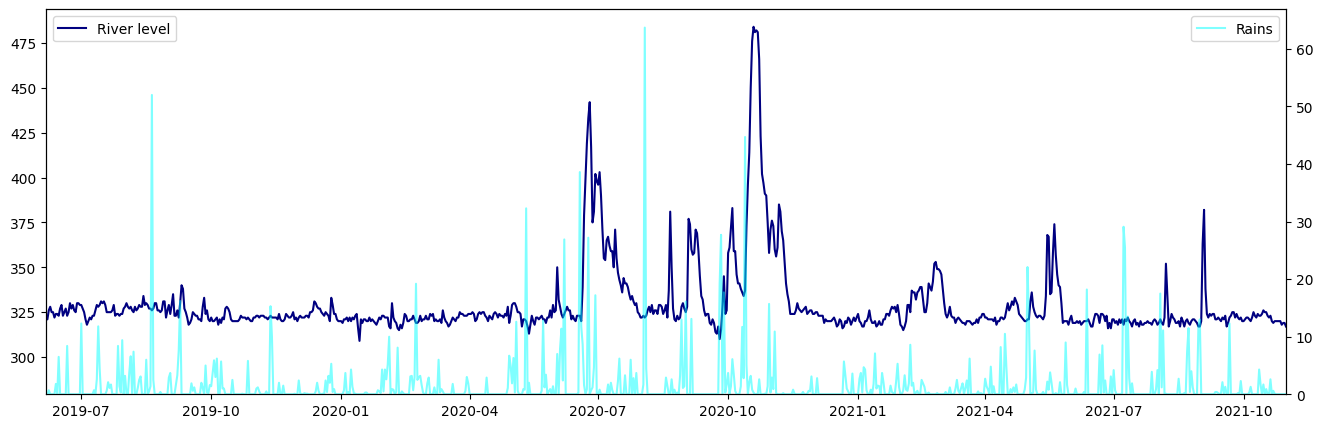

In [9]:
for _, stations in hierarchy.iterrows():
    if stations['id_meteo']!=0:
        fig, ax = plt.subplots(1, 1, figsize=(16, 5))
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)
        
        ax.plot(dataset['Data'], dataset[water_level_col], label='River level', color='navy')

        ax2 = ax.twinx()
        ax2.plot(dataset['Data'], dataset[rain_col], label='Rains', color='aqua', linewidth=1.5, alpha=0.5)


        # decorations
        ax.set_xlim([dataset.loc[~(pd.isnull(dataset[rain_col])), 'Data'].min(), dataset['Data'].max()])
        ax.legend(loc='upper left')
        
        ax2.legend(loc='upper right')
        ax2.set_ylim([0, dataset[rain_col].max()*1.05])
        
        plt.show()

How the river level changes in the following years.

In [59]:
dataset_years_monthly = dataset.copy()
dataset_years_monthly['Rok'] = dataset_years_monthly['Data'].dt.year
dataset_years_monthly['Miesiąc'] = [d.strftime('%b') for d in dataset_years_monthly['Data']]

dataset_years_monthly = dataset_years_monthly.drop(['Data'] + list(dataset_years_monthly.filter(regex=('Brak pomiaru')).columns),
                                                   axis=1)
dataset_years_monthly = dataset_years_monthly.groupby(['Rok', 'Miesiąc']).mean()
dataset_years_monthly.reset_index(inplace=True)


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dataset_years_monthly['Miesiąc'] = pd.Categorical(dataset_years_monthly['Miesiąc'], categories=months, ordered=True)
dataset_years_monthly.sort_values(by=['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly.reset_index(drop=True, inplace=True)

dataset_years_monthly.head(3)

,Rok,Miesiąc,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm]
0,2017,Nov,215.966667,320.100000,297.966667,325.433333,NaN,1.423333,NaN
1,2017,Dec,214.483871,314.322581,265.806452,322.322581,NaN,1.464516,NaN
2,2018,Jan,216.419355,324.612903,284.290323,320.774194,NaN,1.674194,NaN


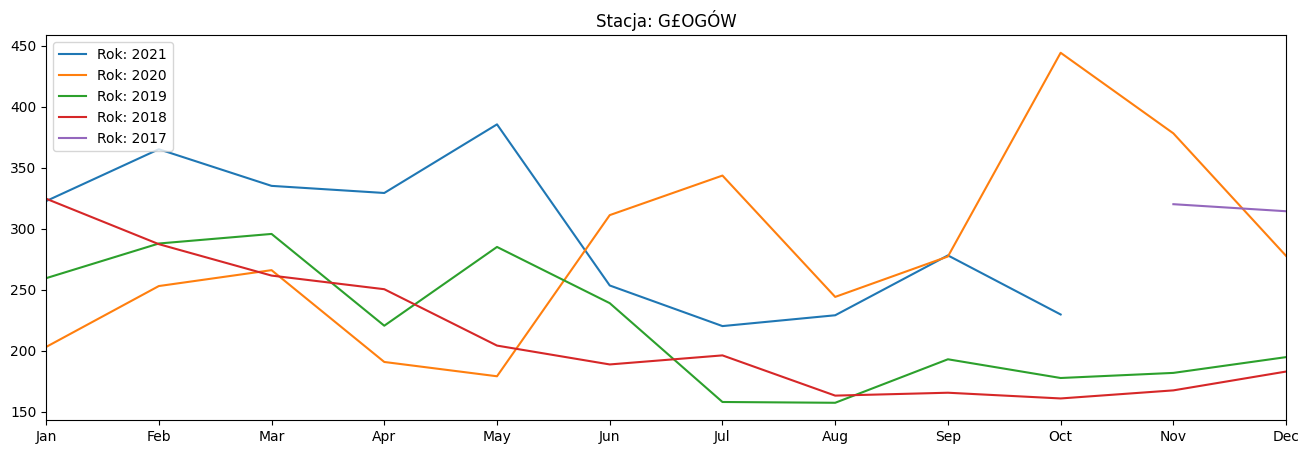

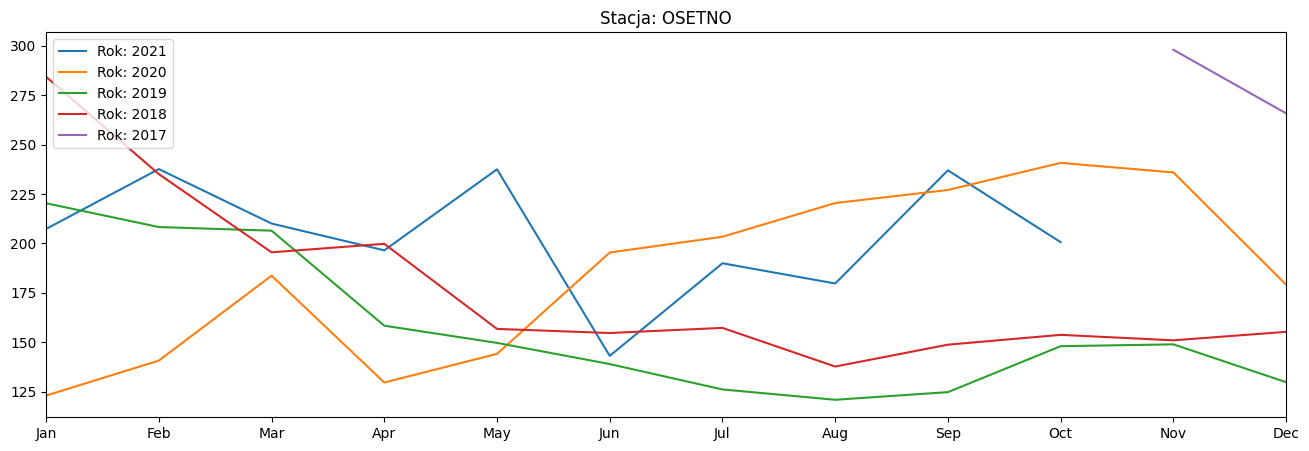

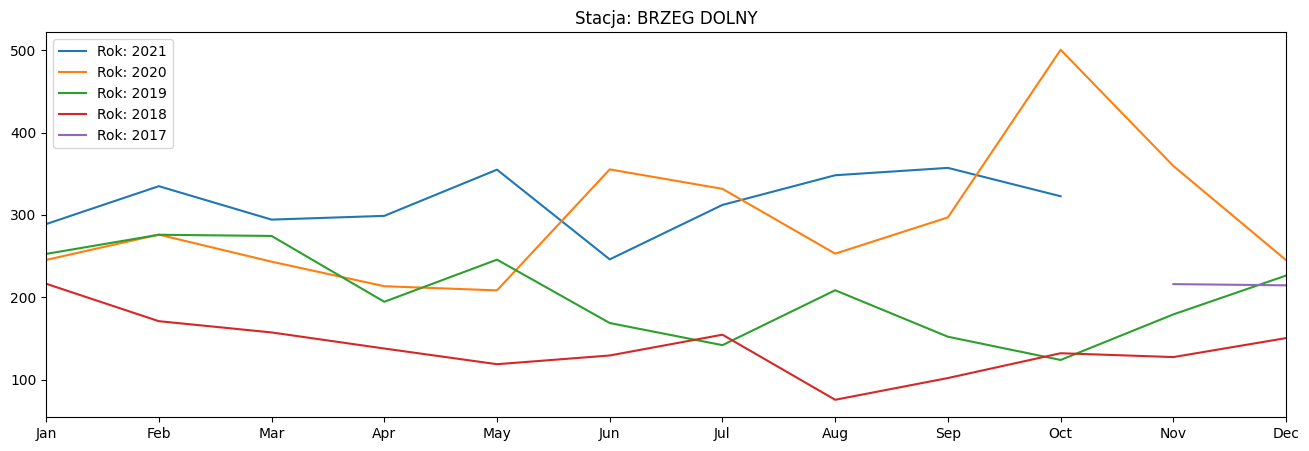

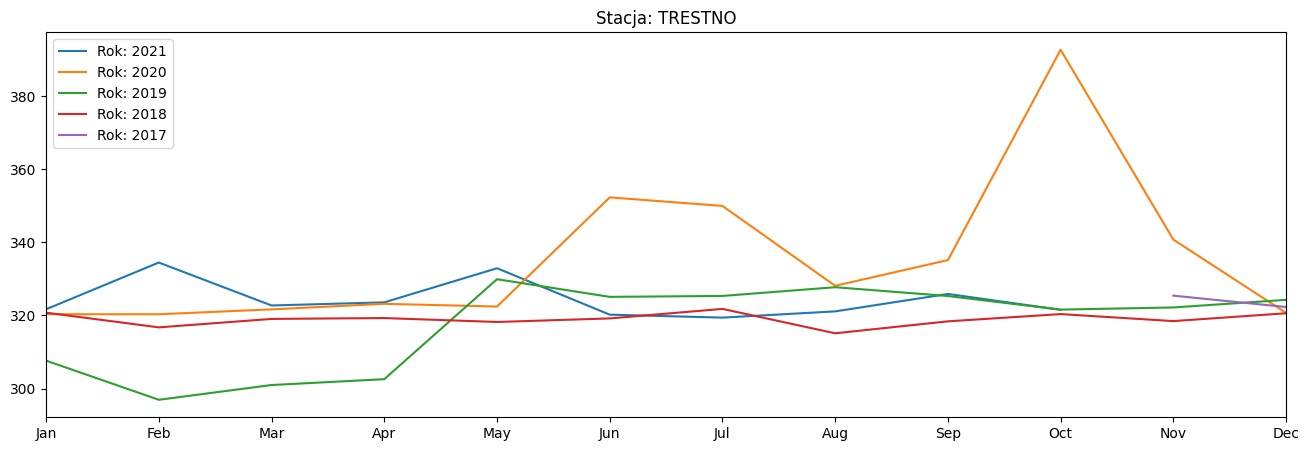

In [58]:
for _, stations in hierarchy.iterrows():
    plt.figure(figsize=(16, 5))
    
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    for year in dataset_years_monthly['Rok'].unique()[::-1]:
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        plt.plot(dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, 'Miesiąc'], 
                 dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, water_level_col], label=f'Rok: {year}')
    
# decorations
    plt.title(f'Stacja: {stations["name_hydro"]}')
    plt.xlim(['Jan', 'Dec'])
    plt.legend(loc='upper left')
    plt.show()

Effect of average rain on average normalized river level

In [76]:
dataset_years_monthly_normalized = dataset_years_monthly.copy()

# Level of water
for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    dataset_years_monthly_normalized[water_level_col] = \
        (dataset_years_monthly_normalized[water_level_col] - dataset_years_monthly_normalized[water_level_col].min())/\
        (dataset_years_monthly_normalized[water_level_col].max() - dataset_years_monthly_normalized[water_level_col].min())
    
# Rain
rain_cols = dataset_years_monthly_normalized.filter(regex=("Suma opadów")).columns
dataset_years_monthly_normalized[rain_cols] = \
        (dataset_years_monthly_normalized[rain_cols] - dataset_years_monthly_normalized[rain_cols].min().min())/\
        (dataset_years_monthly_normalized[rain_cols].max().max() - dataset_years_monthly_normalized[rain_cols].min().min())

dataset_years_monthly_normalized.tail(3)

,Rok,Miesiąc,BRZEG DOLNY (151160170) Stan wody [cm],G£OGÓW (151160060) Stan wody [cm],OSETNO (151160140) Stan wody [cm],TRESTNO (151170030) Stan wody [cm],BRZEG DOLNY (251160230) Suma opadów [mm],OSETNO (251160110) Suma opadów [mm],£ANY (251170420) Suma opadów [mm]
45,2021,Aug,0.641518,0.250028,0.332242,0.252579,0.511969,0.763513,0.486872
46,2021,Sep,0.662550,0.421070,0.655553,0.302374,0.105023,0.109848,0.100801
47,2021,Oct,0.581480,0.252276,0.450340,0.256956,0.045648,0.106346,0.061990


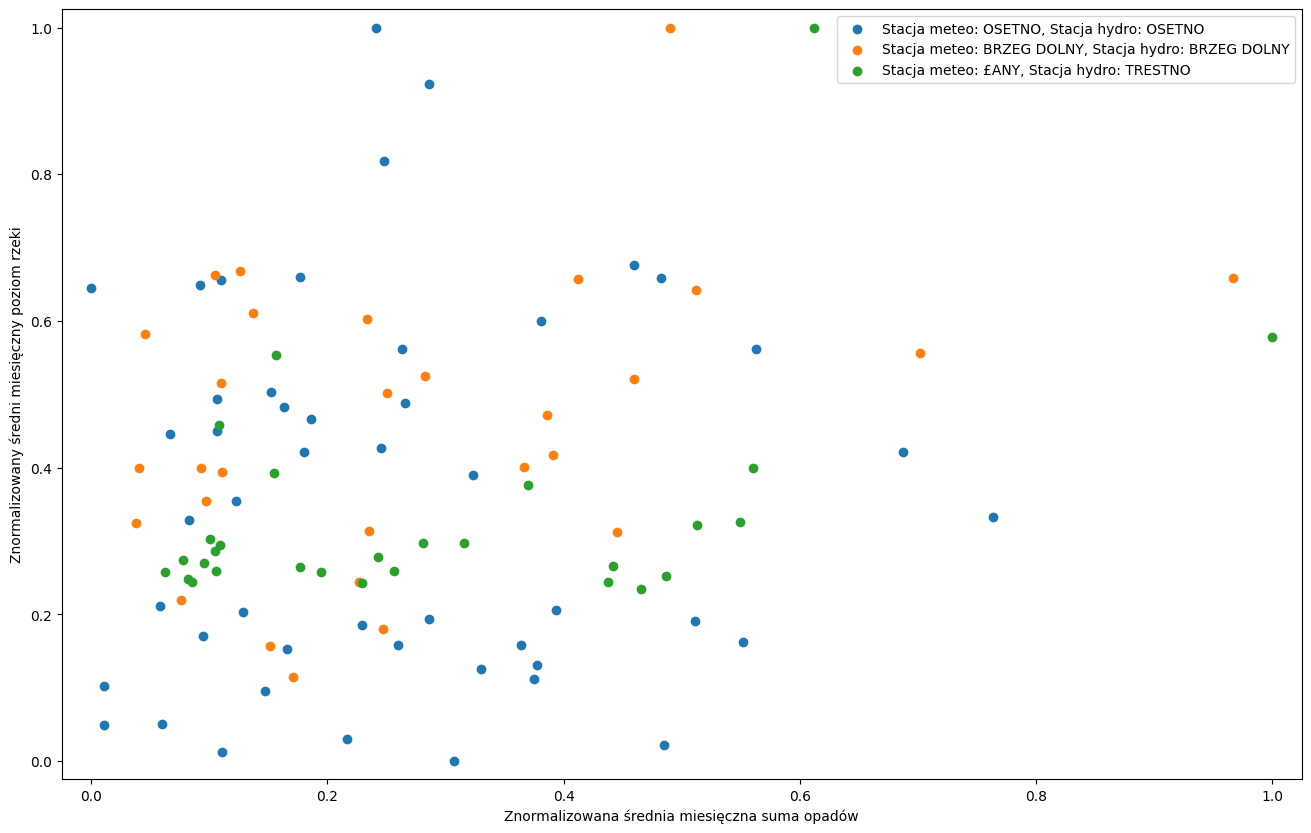

In [88]:
plt.figure(figsize=(16, 10))

for _, stations in hierarchy.iterrows():
    if stations['id_meteo']!=0:
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)

        plt.scatter(dataset_years_monthly_normalized[rain_col], dataset_years_monthly_normalized[water_level_col],
                    label=f'Stacja meteo: {stations["name_meteo"]}, Stacja hydro: {stations["name_hydro"]}')

    
# decorations
plt.ylim([-0.025, 1.025])
plt.xlim([-0.025, 1.025])
plt.xlabel('Znormalizowana średnia miesięczna suma opadów')
plt.ylabel('Znormalizowany średni miesięczny poziom rzeki')
plt.legend(loc='upper right')
plt.show()

Sezonowość / Trend

In [96]:
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized.copy()
dataset_years_monthly_normalized_combined.set_index(['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined[
                                                        dataset_years_monthly_normalized.filter(regex=("Stan wody")).columns]
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined.stack().to_frame()
dataset_years_monthly_normalized_combined.rename({0: 'Średni stan wody'}, axis=1, inplace=True)
dataset_years_monthly_normalized_combined.reset_index(inplace=True)

dataset_years_monthly_normalized_combined

,Rok,Miesiąc,level_2,Średni stan wody
0,2017,Nov,BRZEG DOLNY (151160170) Stan wody [cm],0.330472
1,2017,Nov,G£OGÓW (151160060) Stan wody [cm],0.567378
2,2017,Nov,OSETNO (151160140) Stan wody [cm],1.000000
3,2017,Nov,TRESTNO (151170030) Stan wody [cm],0.297503
4,2017,Dec,BRZEG DOLNY (151160170) Stan wody [cm],0.326983
...,...,...,...,...
187,2021,Sep,TRESTNO (151170030) Stan wody [cm],0.302374
188,2021,Oct,BRZEG DOLNY (151160170) Stan wody [cm],0.581480
189,2021,Oct,G£OGÓW (151160060) Stan wody [cm],0.252276
190,2021,Oct,OSETNO (151160140) Stan wody [cm],0.450340


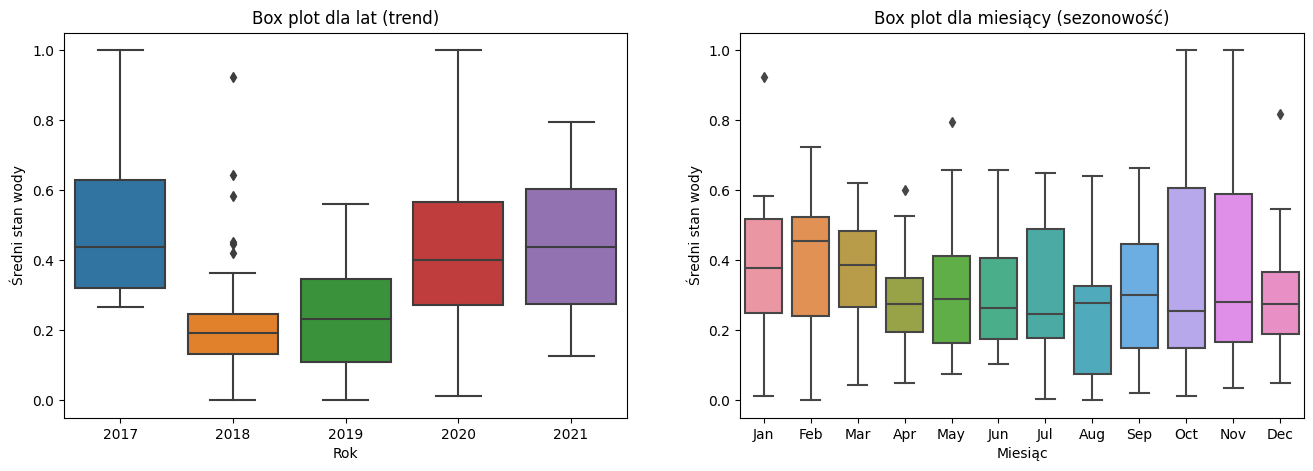

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=100)

sns.boxplot(x='Rok', y='Średni stan wody', data=dataset_years_monthly_normalized_combined, ax=axes[0]).set(
    xlabel='Rok', 
    ylabel='Średni stan wody'
)
axes[0].set_title('Box plot dla lat (trend)')

sns.boxplot(x='Miesiąc', y='Średni stan wody', data=dataset_years_monthly_normalized_combined, ax=axes[1]).set(
    xlabel='Miesiąc', 
    ylabel='Średni stan wody'
)
axes[1].set_title('Box plot dla miesiący (sezonowość)')

plt.show()

Cross-correlation ~ poziomy rzeki w różnych stacjach

Cross-correlation ~ poziomy rzeki w stacji a przeszłe opady.

Porównanie wpływu skorelowanej rzeki oraz opadów.

INNE ZMIENNE? Exploratory time series different.